In [5]:
# 1. Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
# Load dữ liệu từ Google Drive
from google.colab import drive
drive.mount('/content/drive/')
data_dir = '/content/drive/My Drive/Colab Notebooks/Data/Tea_leaf_Disease_Dataset'


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
# 2. Load và xử lý dữ liệu
class_names = ['Tea red scab', 'Tea red leaf spot', 'Tea leaf blight', 'Healthy']

x_data = [] #Lưu trữ dữ liệu hình ảnh sau khi được chuyển đổi thành ma trận.
y_data = [] #Lưu trữ nhãn (label) tương ứng của mỗi hình ảnh.
for label, class_name in enumerate(class_names): # enumerate(class_names) giúp lấy cả nhãn (label) và tên lớp (class_name).
    class_dir = os.path.join(data_dir, class_name) # class_dir là đường dẫn thư mục chứa hình ảnh cho lớp dữ liệu đó.
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('jpg', 'png', 'jpeg')):
            img_path = os.path.join(class_dir, file_name)
            img = load_img(img_path, target_size=(150, 150))#Tải hình ảnh từ đường dẫn img_path và resize về kích thước cố định (150, 150).
            img_array = img_to_array(img) / 255.0 # Chuẩn hóa giá trị pixel từ [0, 255] về [0, 1].
            x_data.append(img_array) #Thêm dữ liệu hình ảnh (img_array) vào x_data.
            y_data.append(label) #Thêm nhãn số (label) vào y_data.

x_data = np.array(x_data)
y_data = to_categorical(np.array(y_data), num_classes=len(class_names))  # One-hot encoding
print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")

x_data shape: (2520, 150, 150, 3)
y_data shape: (2520, 4)


In [8]:
# 3. Chia tập dữ liệu
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (1764, 150, 150, 3), y_train shape: (1764, 4)
x_val shape: (378, 150, 150, 3), y_val shape: (378, 4)
x_test shape: (378, 150, 150, 3), y_test shape: (378, 4)


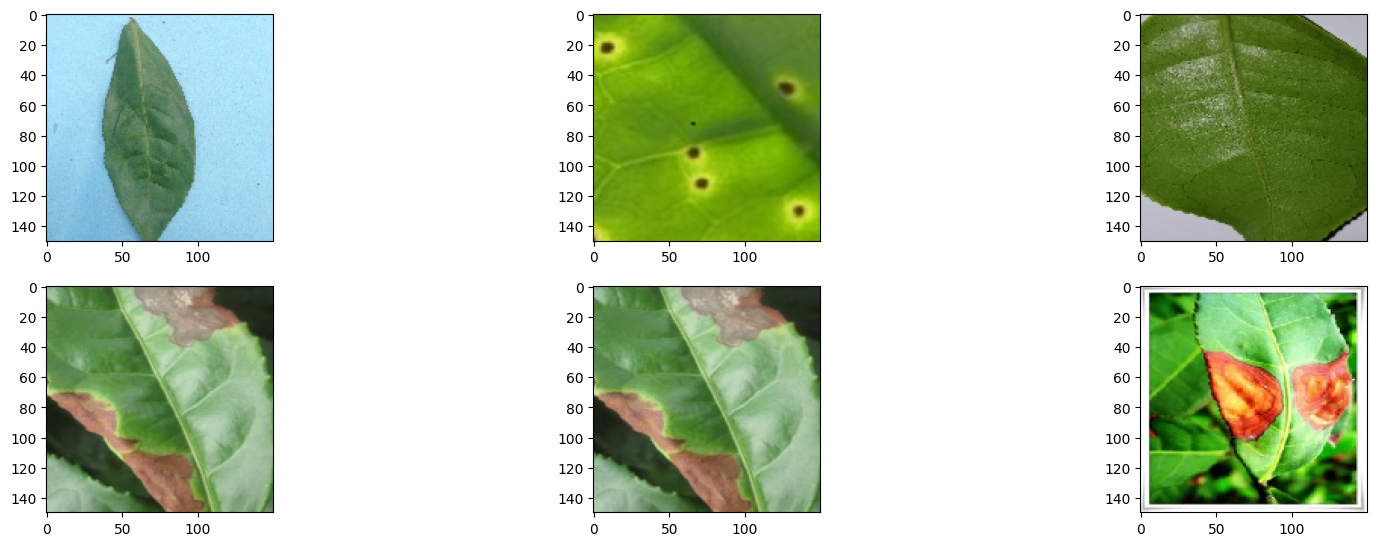

In [9]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [10]:
# 4. Tạo model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)), #Lớp gộp tối đa dùng để giảm kích thước không gian của đặc trưng, giúp giảm số lượng tham số và tránh overfitting.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 5. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [12]:
# 6. Train model
H = model.fit(x_train, y_train, validation_data=(x_val, y_val),
              batch_size=32, epochs=20, verbose=1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.5801 - loss: 1.0312 - val_accuracy: 0.9180 - val_loss: 0.1945
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9391 - loss: 0.1665 - val_accuracy: 0.9709 - val_loss: 0.0761
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9860 - loss: 0.0417 - val_accuracy: 0.9868 - val_loss: 0.0312
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9851 - loss: 0.0414 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9934 - loss: 0.0254 - val_accuracy: 0.9921 - val_loss: 0.0204
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9868 - loss: 0.0399 - val_accuracy: 0.9762 - val_loss: 0.0575
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9738 - loss: 0.0867 - val_accuracy: 0.9841 - val_loss: 0.0885
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9791 - loss: 0.0662 - val_accuracy: 0.9894 

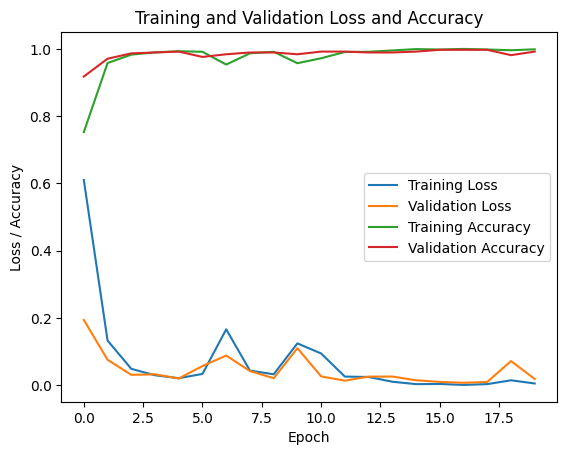

In [13]:
# 7. Vẽ đồ thị loss và accuracy
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [14]:
# 8. Đánh giá model
score = model.evaluate(x_val, y_val, verbose=0)
print(f"Test Loss: {score[0]}, Test Accuracy: {score[1]}")

Test Loss: 0.01897924579679966, Test Accuracy: 0.9920634627342224


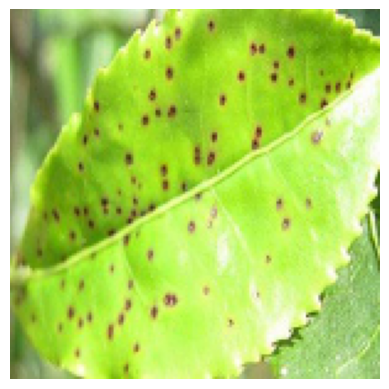

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
Giá trị dự đoán:  Tea red scab


In [15]:
# 9. Dự đoán trên mẫu test
plt.imshow(x_test[4])
plt.axis('off')
plt.show()

y_predict = model.predict(x_test[4].reshape(1, 150, 150, 3))
print('Giá trị dự đoán: ', class_names[np.argmax(y_predict)])

In [16]:
# 10. Lưu model
model.save('/content/drive/My Drive/Colab Notebooks/Data/tea_leaf_model.h5')